<a href="https://colab.research.google.com/github/NMThanh123/AI_Report/blob/main/Report_AI_Predict_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict dishes Viet Nam

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix_dish.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(5500, 224, 224, 3)
(5500, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test

In [ ]:

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1,1), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
h = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64), verbose=1)

<ipython-input-17-9d5199f8bd41>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64), verbose=1)


Epoch 1/25
69/69 [==============================] - 87s 1s/step - loss: 2.2291 - accuracy: 0.1445 - val_loss: 2.1092 - val_accuracy: 0.2055
Epoch 2/25
69/69 [==============================] - 72s 1s/step - loss: 2.0428 - accuracy: 0.2545 - val_loss: 2.0342 - val_accuracy: 0.2382
Epoch 3/25
69/69 [==============================] - 81s 1s/step - loss: 2.0205 - accuracy: 0.2611 - val_loss: 2.0706 - val_accuracy: 0.2618
Epoch 4/25
69/69 [==============================] - 72s 1s/step - loss: 1.9551 - accuracy: 0.2898 - val_loss: 1.9444 - val_accuracy: 0.3109
Epoch 5/25
69/69 [==============================] - 81s 1s/step - loss: 1.8894 - accuracy: 0.3277 - val_loss: 1.8644 - val_accuracy: 0.3218
Epoch 6/25
69/69 [==============================] - 81s 1s/step - loss: 1.7998 - accuracy: 0.3575 - val_loss: 1.8054 - val_accuracy: 0.3645
Epoch 7/25
69/69 [==============================] - 72s 1s/step - loss: 1.7116 - accuracy: 0.3943 - val_loss: 1.6893 - val_accuracy: 0.4082
Epoch 8/25
69/69 [==

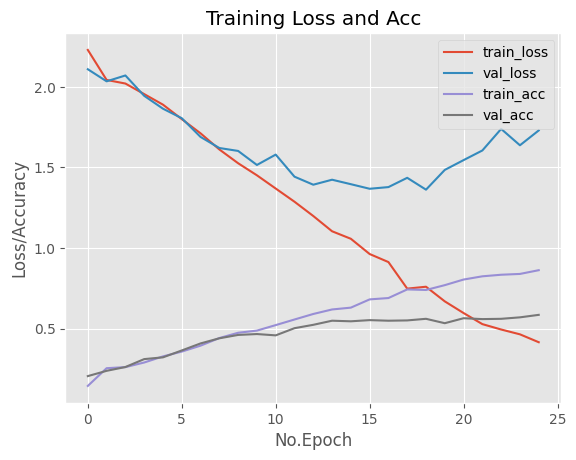

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 25), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 25), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Acc")
plt.xlabel("No.Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Report/Model_AI/model_dish.h5')

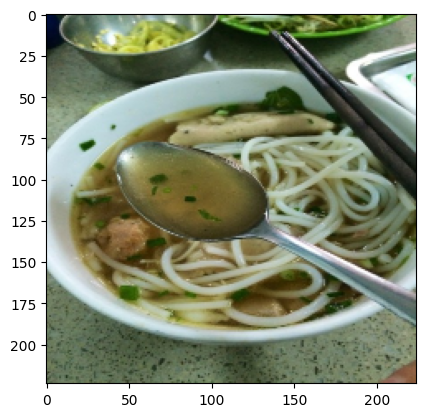

1/1 [==============================] - 0s 27ms/step
This picture is:  Pho [9.5514493e-05 1.3249263e-07 1.4686459e-04 1.9949590e-01 2.4015431e-08
 1.0555738e-02 6.1739934e-07 2.2072315e-06 1.0711265e-03 7.8863192e-01]


In [ ]:
class_name = ['Banh cuon', 'Banh mi', 'Banh xeo', 'Bun bo Hue', 'Bun dau mam tom', 'Chao long', 'Com tam', 'Goi cuon', 'Mi quang', 'Pho']
image = X[0]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(c)
plt.show()

img = X_test[0]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
# print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
# print(np.max(result[0],axis=0))